# Импорт модулей

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.8.2


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import PolynomialFeatures

# Работа с исходными данными

Подключение Google-disc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузка данных из таблиц

In [ ]:
DF_bp = pd.read_excel('/content/drive/MyDrive/ВКР DS/data/X_bp.xlsx')
DF_nup = pd.read_excel('/content/drive/MyDrive/ВКР DS/data/X_nup.xlsx')

Просмотр содержимого таблиц

In [ ]:
DF_bp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [ ]:
DF_nup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.000000,57.000000
1,1.0,0.0,4.000000,60.000000
2,2.0,0.0,4.000000,70.000000
3,3.0,0.0,5.000000,47.000000
4,4.0,0.0,5.000000,57.000000
...,...,...,...,...
1035,1035.0,90.0,8.088111,47.759177
1036,1036.0,90.0,7.619138,66.931932
1037,1037.0,90.0,9.800926,72.858286
1038,1038.0,90.0,10.079859,65.519479


Удаление колонок с индексами и объединение датасетов

In [ ]:
DF_bp.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)
DF_nup.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

DF = DF_bp.merge(DF_nup, left_index=True, right_index=True, how='inner')

Просмотр объединенного датасета

In [ ]:
DF.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


# Разведочный анализ

Проверка наличия пропусков

In [ ]:
DF.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Визуализация наличия пропусков в виде тепловой карты. Пропусков нет.

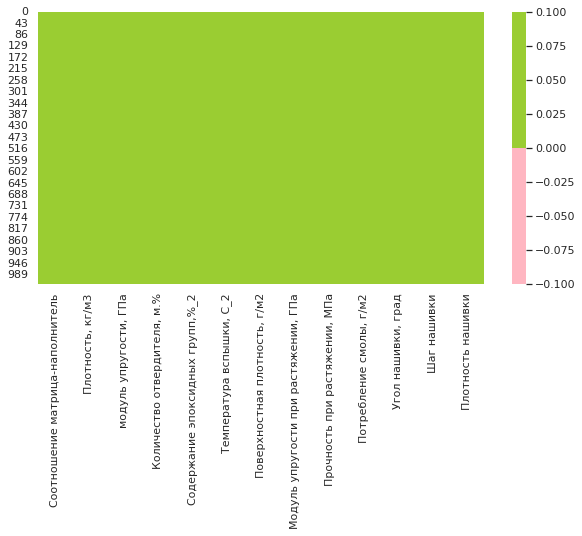

In [ ]:
columns = DF
sns.set(rc = {'figure.figsize':(10,5)})
colours = ['#FFB6C1', '#9ACD32'] 
sns.heatmap(DF.isnull(), cmap=sns.color_palette(colours))

Общая информация об объединенном датасете

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

Описательная статистика (количество значений, среднее значение, стандартное отклонение, минимум, верхнее значение первого квартиля, медиана, верхнее значение третьего квартиля, максимум по каждому столбцу)

In [ ]:
DF.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.93,0.91,0.39,2.32,2.91,3.55,5.59
"Плотность, кг/м3",1023.0,1975.73,73.73,1731.76,1924.16,1977.62,2021.37,2207.77
"модуль упругости, ГПа",1023.0,739.92,330.23,2.44,500.05,739.66,961.81,1911.54
"Количество отвердителя, м.%",1023.0,110.57,28.30,17.74,92.44,110.56,129.73,198.95
"Содержание эпоксидных групп,%_2",1023.0,22.24,2.41,14.25,20.61,22.23,23.96,33.00
"Температура вспышки, С_2",1023.0,285.88,40.94,100.00,259.07,285.90,313.00,413.27
"Поверхностная плотность, г/м2",1023.0,482.73,281.31,0.60,266.82,451.86,693.23,1399.54
"Модуль упругости при растяжении, ГПа",1023.0,73.33,3.12,64.05,71.25,73.27,75.36,82.68
"Прочность при растяжении, МПа",1023.0,2466.92,485.63,1036.86,2135.85,2459.52,2767.19,3848.44
"Потребление смолы, г/м2",1023.0,218.42,59.74,33.80,179.63,219.20,257.48,414.59


Количество уникальных значений

In [ ]:
DF.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Гистограммы распределения (для каждого параметра)

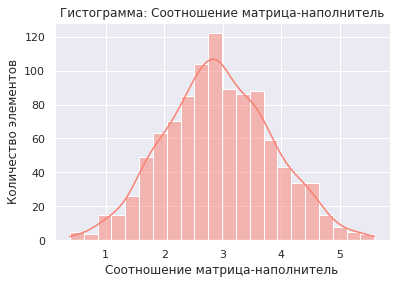

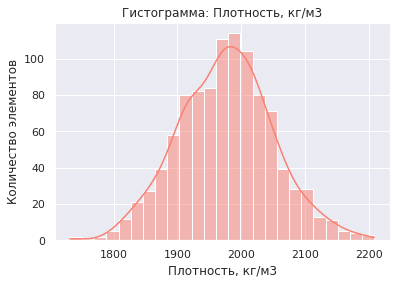

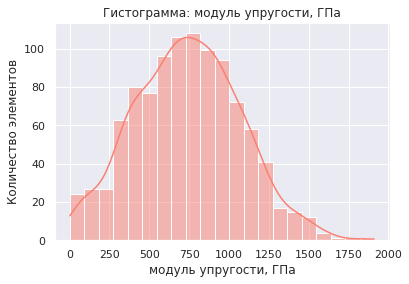

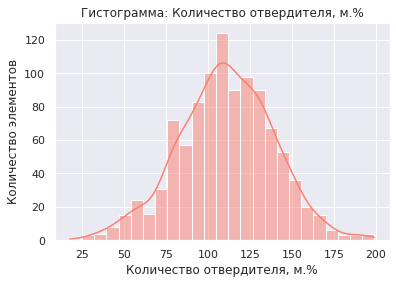

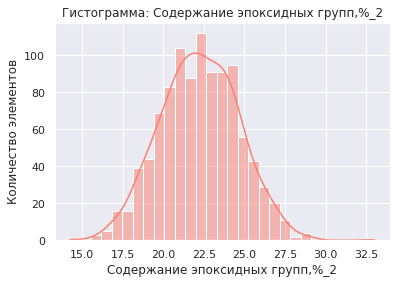

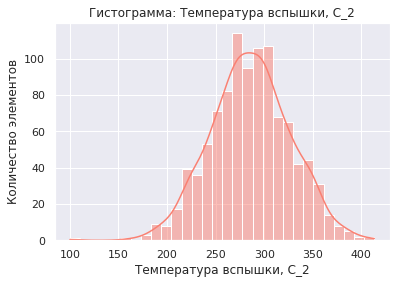

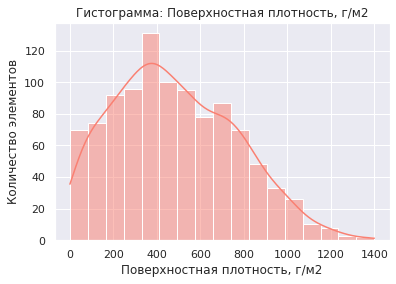

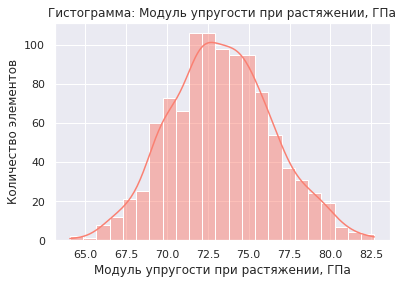

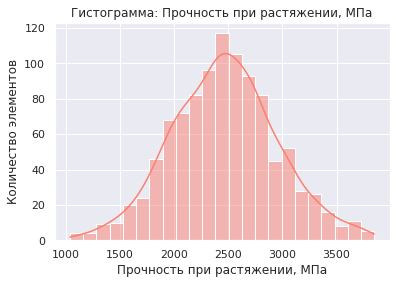

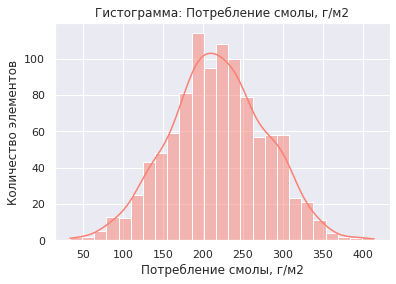

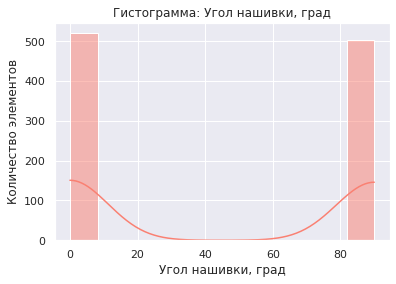

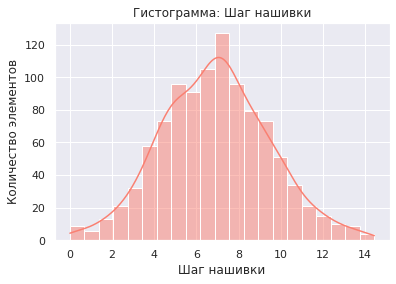

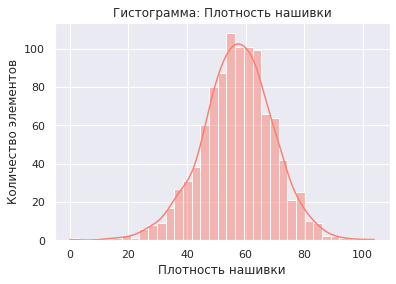

In [ ]:
for column in DF.columns:
  plt.figure(figsize=(6,4))
  plt.title('Гистограмма:' + ' ' + column)
  plt.ylabel('Количество элементов')
  sns.histplot(data = DF[column], kde = True, color='#FA8072')
  plt.show()

Для большинства характеристик распределение близко к нормальному. Исключением являются показатели "Поверхностная плотность, г/м2" (нормальное распределение со смещением вправо, вероятнее всего было проведено большое количество измерений с меньшим показателем поверхностной плотности) и "Угол нашивки, град" (дискретное распределение, т.к. колонка содержит всего два уникальных значения)

Диаграммы boxplot или "ящик с усами"

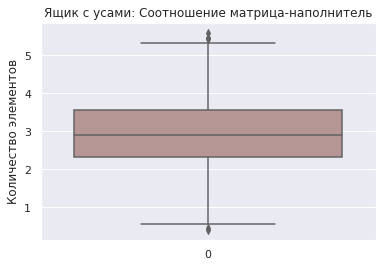

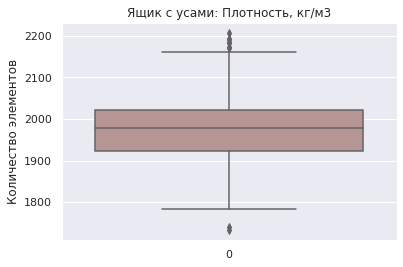

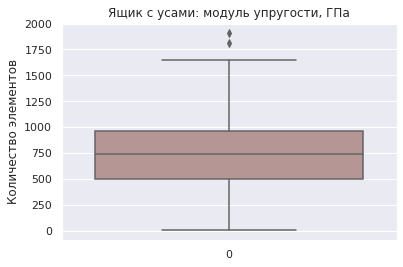

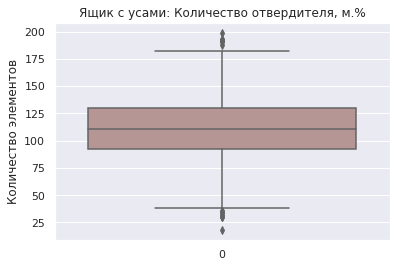

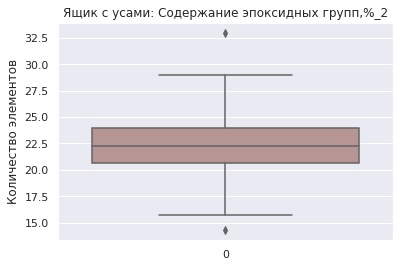

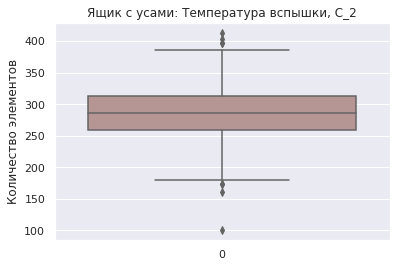

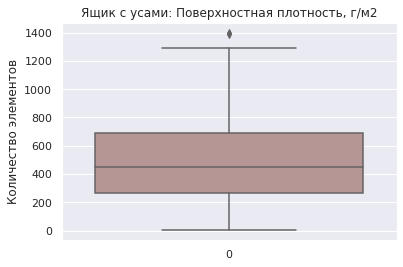

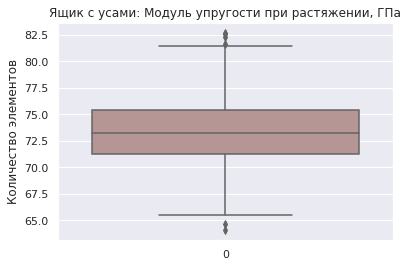

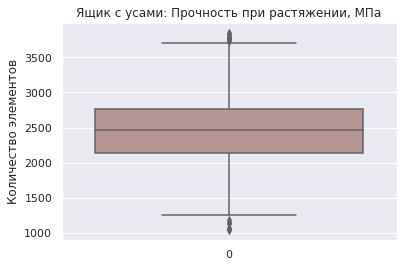

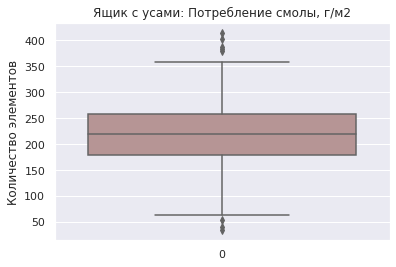

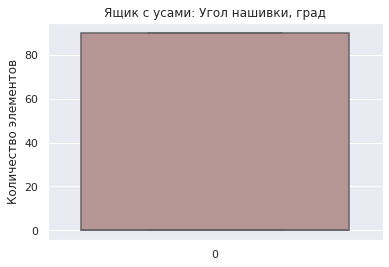

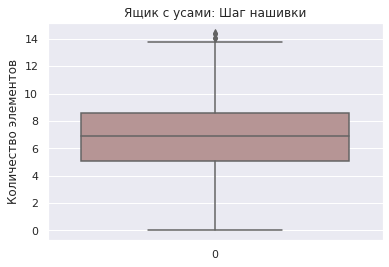

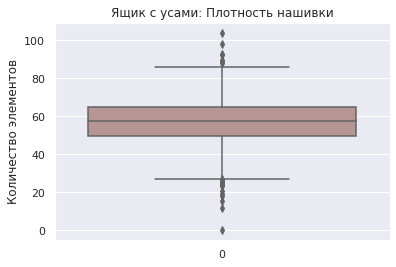

In [ ]:
for column in DF.columns:
  plt.figure(figsize=(6,4))
  plt.title('Ящик с усами:' + ' ' + column)
  plt.ylabel('Количество элементов')
  sns.boxplot(data = DF[column], color = '#BC8F8F')
  plt.show()

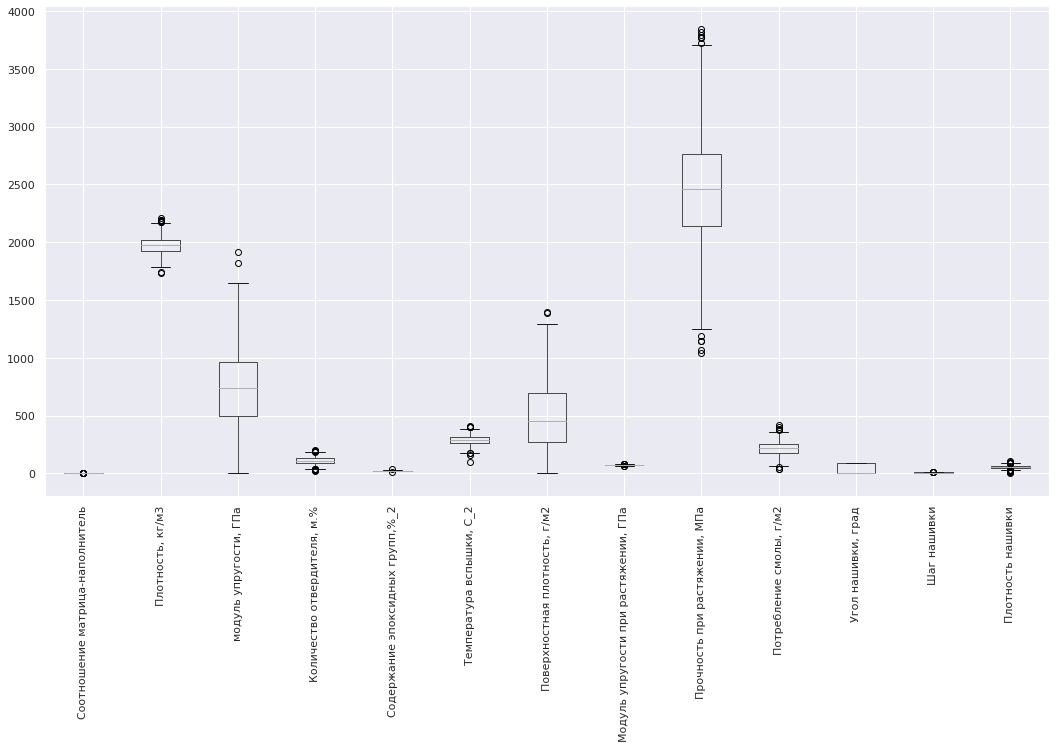

In [ ]:
boxplot = DF.boxplot(rot = 90, figsize=(18,9))

По диаграммам можно сделать вывод о том, что выбросы есть по всем характеристикам, кроме "Угол нашивки, град"

Попарные графики рассеяния точек

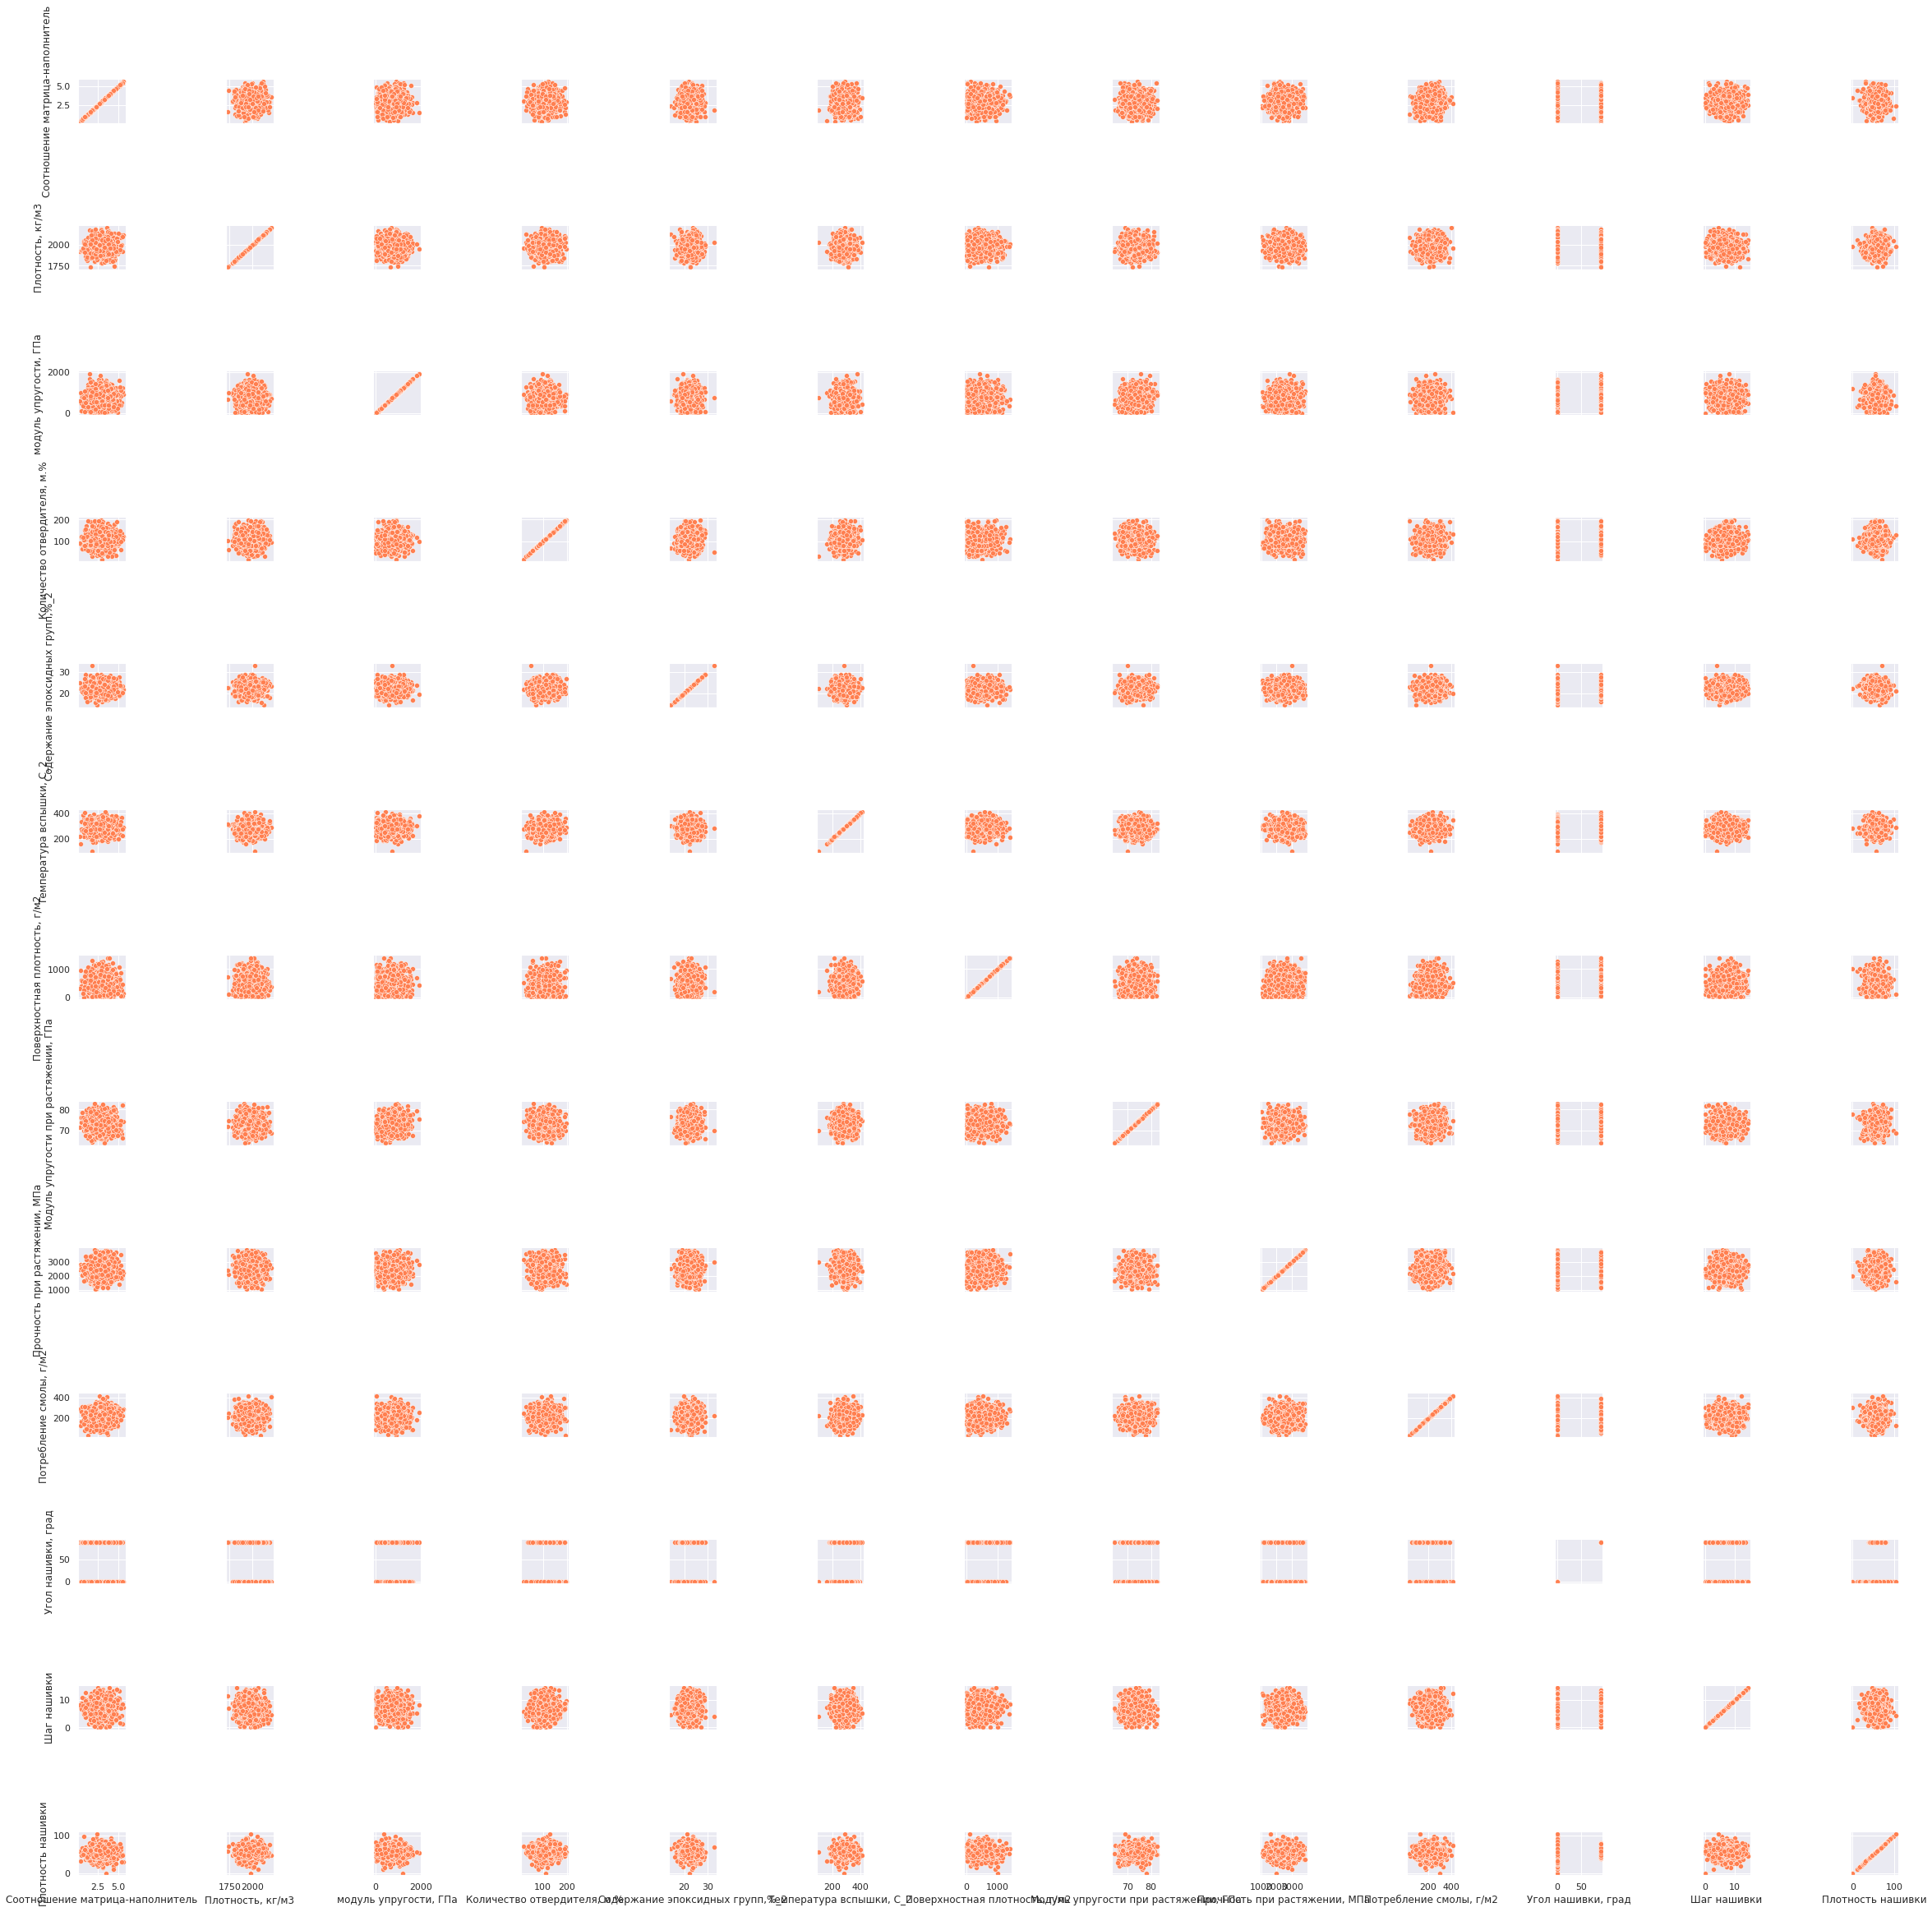

In [ ]:
columns = DF.columns
g = sns.PairGrid(DF[columns])
g.map(sns.scatterplot, color ='#FF7F50')

Попарные графики рассеяния показывают очень слабую зависимость между переменными датасета. Также можно проследить наличие некоторого количества выбросов

Применение коэффициента корреляции для дальнейшего построения тепловой карты

In [ ]:
DF.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


Тепловая карта признаков

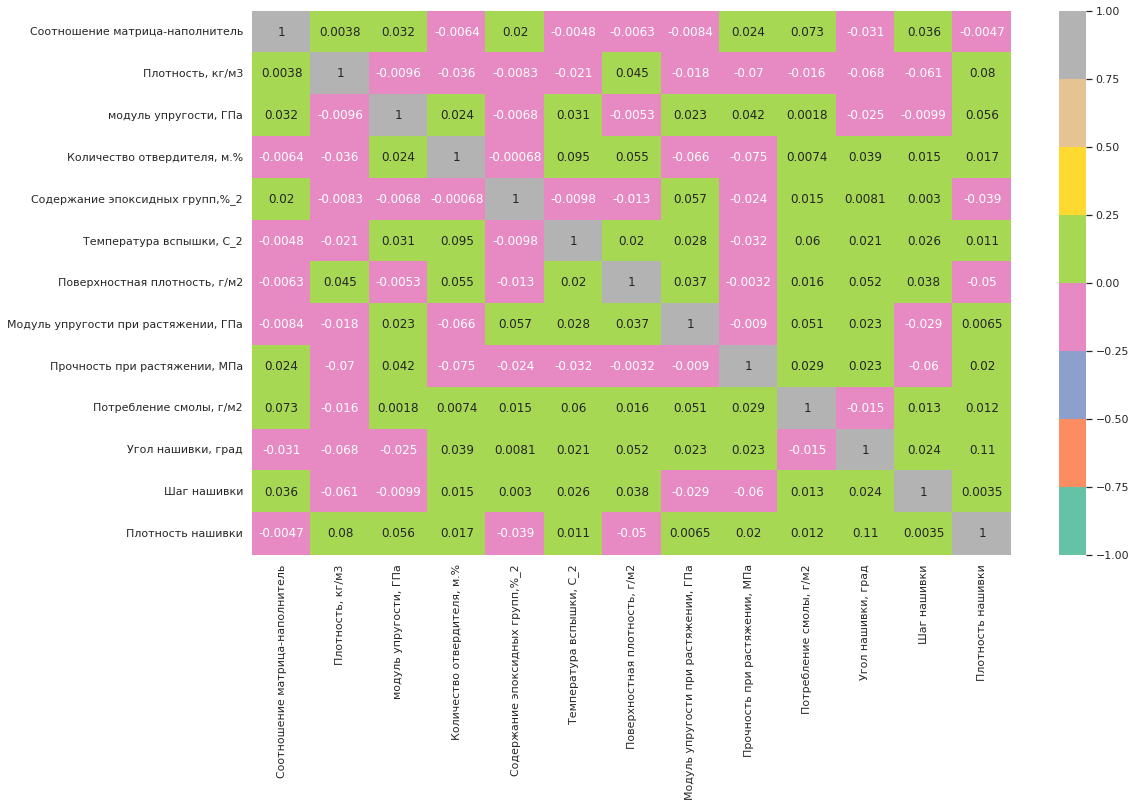

In [ ]:
sns.set(rc = {'figure.figsize':(17,10)})
sns.heatmap(DF.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Set2')

Тепловая карта хорошо демонстрирует наличие слабой корреляции переменных в датасете. Все полученные коэффициенты корреляции находятся в промежутке значений от - 0,25 до 0,25. Т.е. скорее всего представленный детасет был предобработан и оставшиеся переменные являются независимыми, каждая из них несет свою функцию при влиянии на композитный материал.

# Предобработка данных

Сравнение методов очистки от выбросов (метод трех сигм и метод межквартильных расстояний)

In [ ]:
count_IQ = 0
for column in DF:
  d = DF.loc[:, [column]]
  Q25 = np.quantile(DF[column], 0.25)
  Q75 = np.quantile(DF[column], 0.75)
  IQR = Q75 - Q25
  lower = Q25 - 1.5 * IQR
  upper = Q75 + 1.5 * IQR
  d['IQ'] = (DF[column] <= lower) | (DF[column] >= upper)
  count_IQ += d['IQ'].sum()
print('Количество выбросов методом межквартильных расстояний:', count_IQ)

Количество выбросов методом межквартильных расстояний: 93


In [ ]:
count_3S = 0
for column in DF:
  d = DF.loc[:, [column]]
  zscore = (DF[column] - DF[column].mean()) / DF[column].std()
  d['3S'] = zscore.abs() > 3
  count_3S += d['3S'].sum()
print('Количество выбросов методом трех сигм:', count_3S)

Количество выбросов методом трех сигм: 24


Методом трех сигм получается меньшее количество выбросов, поэтому выбираем для очистки его (ввиду и так небольшого количества данных в датасете)

In [ ]:
DF_clean = DF[(np.abs(stats.zscore(DF)) <= 3).all(axis = 1)]

Тепловая карта для данных без выбросов

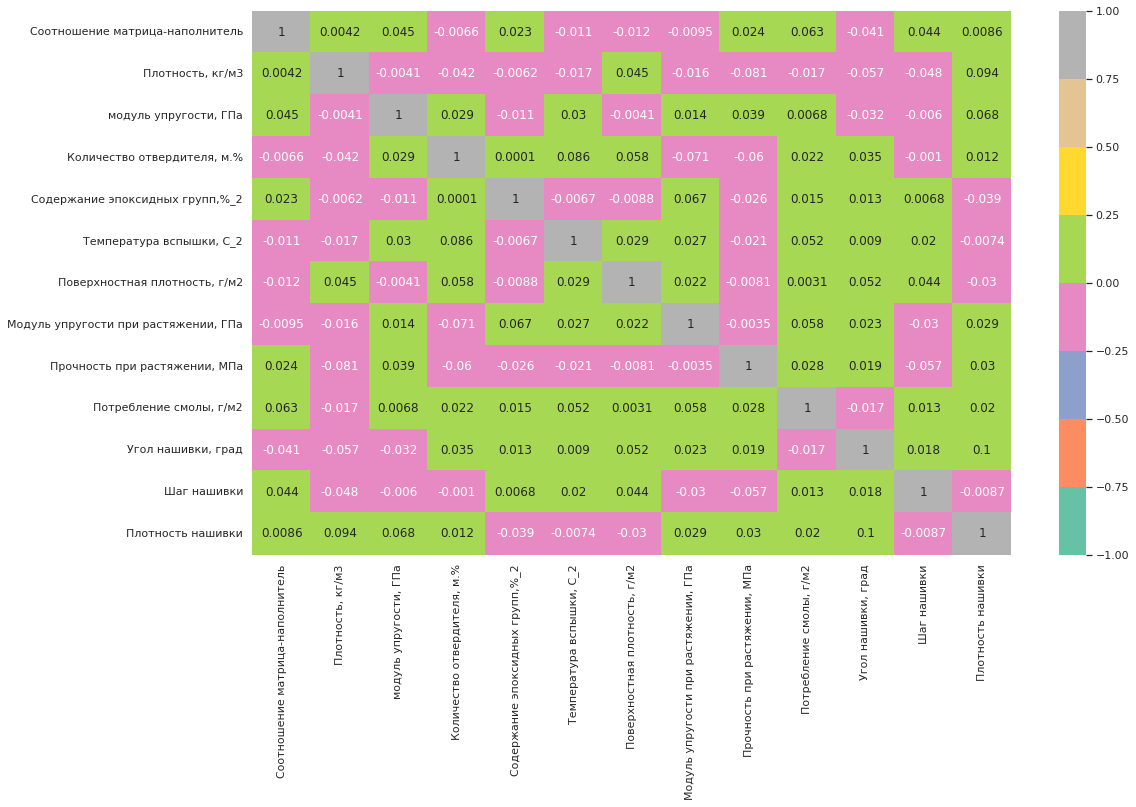

In [ ]:
corr_map = DF_clean.corr()

sns.set(rc = {'figure.figsize':(17,10)})
sns.heatmap(corr_map, vmin = -1, vmax = +1, annot = True, cmap = 'Set2')

По результатам построения тепловой карты видим, что даже после удаления выбросов коэффициент корреляции все еще очень низкий. Это в свою очередь говорит о слабой взаимосвязи между параметрами

Нормализация данных

График разброса данных. Необходимо нормализовать данные, чтобы все параметры имели одинковое влияние

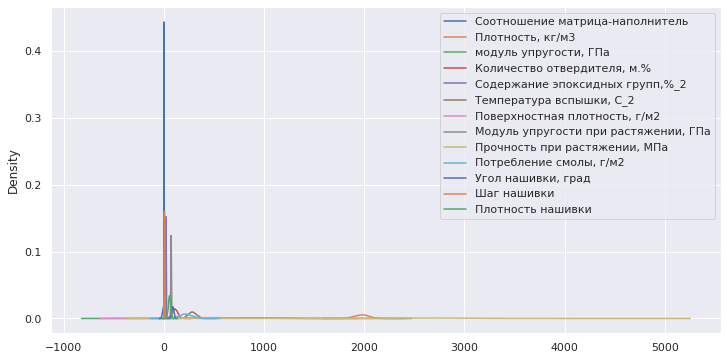

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
DF_clean.plot(kind = 'kde', ax = ax)

Нормализация

In [ ]:
min_max_scaler = MinMaxScaler()
DF_norm = pd.DataFrame(min_max_scaler.fit_transform(DF_clean), columns = DF_clean.columns, index = DF_clean.index)

Построение графика разброса данных после нормализации

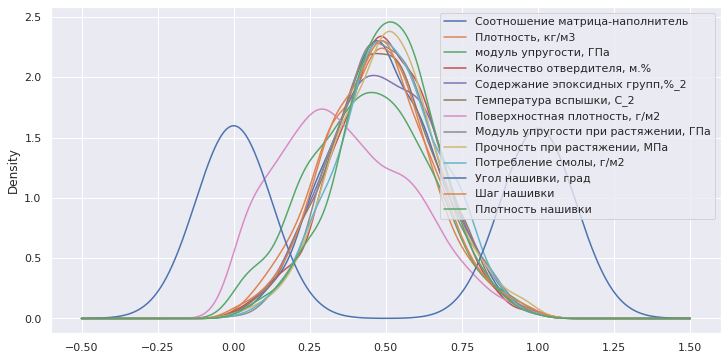

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
DF_norm.plot(kind = 'kde', ax = ax)

Описательная статистика для нормализованного датасета

In [ ]:
DF_norm.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,999.0,0.49,0.17,0.0,0.37,0.48,0.61,1.0
"Плотность, кг/м3",999.0,0.47,0.18,0.0,0.34,0.47,0.58,1.0
"модуль упругости, ГПа",999.0,0.45,0.20,0.0,0.30,0.45,0.58,1.0
"Количество отвердителя, м.%",999.0,0.50,0.17,0.0,0.38,0.50,0.61,1.0
"Содержание эпоксидных групп,%_2",999.0,0.49,0.18,0.0,0.37,0.49,0.62,1.0
"Температура вспышки, С_2",999.0,0.49,0.17,0.0,0.37,0.49,0.61,1.0
"Поверхностная плотность, г/м2",999.0,0.37,0.22,0.0,0.21,0.35,0.53,1.0
"Модуль упругости при растяжении, ГПа",999.0,0.50,0.17,0.0,0.39,0.50,0.61,1.0
"Прочность при растяжении, МПа",999.0,0.51,0.17,0.0,0.39,0.50,0.61,1.0
"Потребление смолы, г/м2",999.0,0.51,0.17,0.0,0.40,0.51,0.63,1.0


Диаграммы ящика с усами для нормализованного датасета

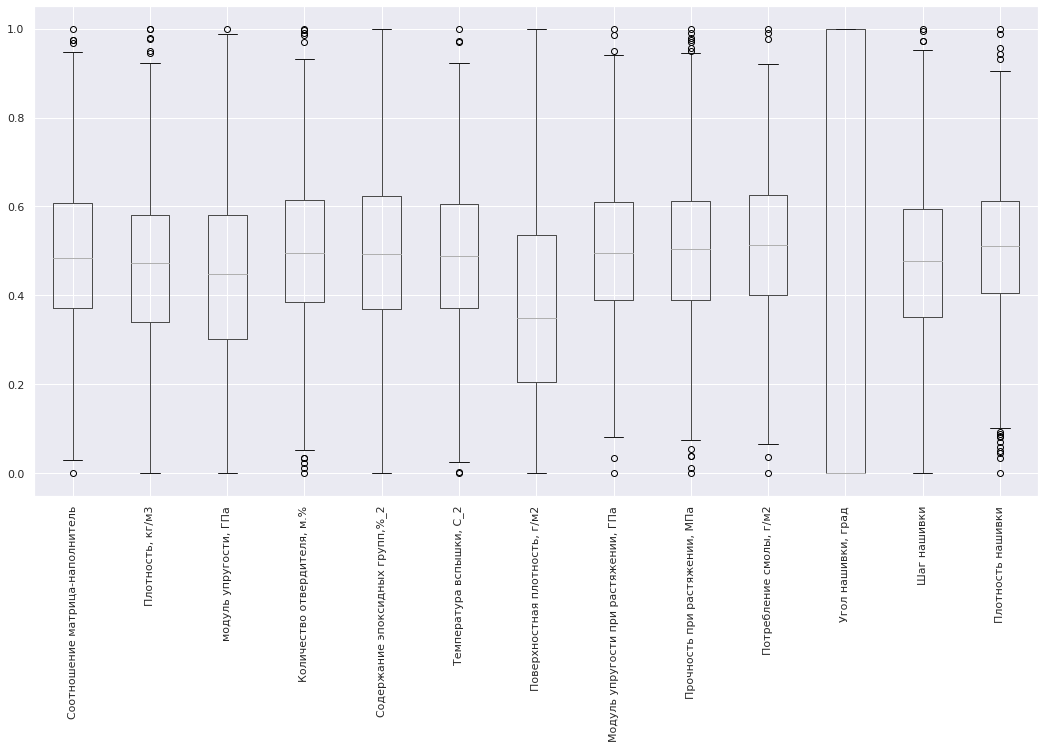

In [ ]:
boxplot = DF_norm.boxplot(rot = 90, figsize=(18,9))

# Обучение моделей

# 1. Модель для прогноза модуля упругости при растяжении

In [ ]:
DF_norm.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [ ]:
X = DF_norm.drop('Модуль упругости при растяжении, ГПа', axis = 1)
y = DF_norm['Модуль упругости при растяжении, ГПа']

Согласно заданию, делим данные на обучающую и тестовую выборку, 70 и 30% соответственно

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 699
Размер тестовой выборки: 300


Создание функций для сокращения размера дальнейшего кода
- GridSearchCVCouner - для поиска лучших параметров модели с помощью GridSearchCV
- ErrorCouner - для вывода результатов работы модели



In [ ]:
def GridSearchCVCouner(model, params, X_train, y_train):
  GSCV = GridSearchCV(model, params, n_jobs=-1, cv=10)  
  GSCV.fit(X_train, y_train)
  GSCV.best_params_
  print(f'Лучший параметр для {model}:')
  print(GSCV.best_params_)
  return GSCV

def ErrorCouner(model, GSCV, X_test, y_test, column):
  best_estimator = GSCV.best_estimator_
  result = pd.DataFrame({
     'Model': f'{model}', 
     'MAE': mean_absolute_error(y_test, best_estimator.predict(X_test)), 
     'MSE': mean_squared_error(y_test, best_estimator.predict(X_test)), 
     'R2 score': best_estimator.score(X_test, y_test)
  }, index=[column])
  print(result)
  return result

Линейная регрессия

In [ ]:
model_LR = LinearRegression()
params = { 'fit_intercept' : ['True', 'False']}

In [ ]:
%%time
GSCV = GridSearchCVCouner(model_LR, params, X_train, y_train.values.ravel())
LR_best = GSCV.fit(X_train, y_train)
ErrorCouner(model_LR, GSCV, X_test, y_test, 'Модуль упругости при растяжении')

Лучший параметр для LinearRegression():
{'fit_intercept': 'True'}
                                              Model       MAE       MSE  \
Модуль упругости при растяжении  LinearRegression()  0.131349  0.026459   

                                 R2 score  
Модуль упругости при растяжении -0.000444  
CPU times: user 230 ms, sys: 58.9 ms, total: 289 ms
Wall time: 1.7 s


"Случайный лес"

In [ ]:
model_RF = RandomForestRegressor(random_state = 42)
params = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}

In [ ]:
%%time
GSCV = GridSearchCVCouner(model_RF, params, X_train, y_train.values.ravel())
RF_best = GSCV.fit(X_train, y_train)
ErrorCouner(model_RF, GSCV, X_test, y_test, 'Модуль упругости при растяжении')

Лучший параметр для RandomForestRegressor(random_state=42):
{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 60}
                                                                  Model  \
Модуль упругости при растяжении  RandomForestRegressor(random_state=42)   

                                     MAE       MSE  R2 score  
Модуль упругости при растяжении  0.13175  0.026568 -0.004559  
CPU times: user 3.51 s, sys: 148 ms, total: 3.66 s
Wall time: 52.5 s


Градиентный бустинг

In [ ]:
model_GB = GradientBoostingRegressor()
params = {
    'learning_rate': np.arange(0.001, 0.1, 0.003),
    'max_depth': np.arange(1, 12, 2),
    'max_features':['log2','sqrt'],    
          }

In [ ]:
%%time
GSCV = GridSearchCVCouner(model_GB, params, X_train, y_train.values.ravel())
GB_best = GSCV.fit(X_train, y_train)
ErrorCouner(model_GB, GSCV, X_test, y_test, 'Модуль упругости при растяжении')

Лучший параметр для GradientBoostingRegressor():
{'learning_rate': 0.001, 'max_depth': 11, 'max_features': 'log2'}
                                                       Model       MAE  \
Модуль упругости при растяжении  GradientBoostingRegressor()  0.131221   

                                      MSE  R2 score  
Модуль упругости при растяжении  0.026508  -0.00228  
CPU times: user 38.4 s, sys: 1.87 s, total: 40.3 s
Wall time: 13min 42s


Метод К-ближайших соседей

In [ ]:
model_KNN = KNeighborsRegressor()
params = {'n_neighbors' : np.arange(1, 201, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

In [ ]:
%%time
GSCV = GridSearchCVCouner(model_KNN, params, X_train, y_train.values.ravel())
KNN_best = GSCV.fit(X_train, y_train)
ErrorCouner(model_KNN, GSCV, X_test, y_test, 'Модуль упругости при растяжении')

Лучший параметр для KNeighborsRegressor():
{'algorithm': 'auto', 'n_neighbors': 119, 'weights': 'uniform'}
                                                 Model       MAE       MSE  \
Модуль упругости при растяжении  KNeighborsRegressor()  0.131367  0.026398   

                                 R2 score  
Модуль упругости при растяжении  0.001881  
CPU times: user 24.7 s, sys: 945 ms, total: 25.6 s
Wall time: 1min 41s


Таблица для сравнения моделей

In [ ]:
def get_metrics(model):
    predicted = model.predict(X_test)
    return (
            mean_absolute_error(predicted, y_test),
            mean_squared_error(predicted, y_test),
            r2_score(predicted, y_test)
           )
                      
models_res = [get_metrics(LR_best), get_metrics(RF_best), get_metrics(GB_best), get_metrics(KNN_best)]
res_data = {'наименование модели': ['Линейная регрессия', 'Случайный лес', 'Градиентный бустинг', 'Метод К-ближайших соседей'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res],
            'mean_squared_error'   : [model_res[1] for model_res in models_res],
            'r2_score'  : [model_res[2] for model_res in models_res]
       }
pd.DataFrame(res_data)

,наименование модели,mean_absolute_error,mean_squared_error,r2_score
0,Линейная регрессия,0.131349,0.026459,-44.148728
1,Случайный лес,0.131750,0.026568,-144.003634
2,Градиентный бустинг,0.131221,0.026508,-1888.958137
3,Метод К-ближайших соседей,0.131367,0.026398,-79.797868


Точность предсказания модели с помощью функции cross_val_score

In [ ]:
#models = [LR_best, RF_best, GB_best, KNN_best]
#for model in models:
#  scores = cross_val_score(model, X_train, y_train, cv=10)
#  print('%0.2f точность при стандартном отклонении %0.2f' % (scores.mean(), scores.std()))

# 2. Модель для прогноза прочности при растяжении

In [ ]:
X = DF_norm.drop('Прочность при растяжении, МПа', axis = 1)
y = DF_norm['Прочность при растяжении, МПа']

Деление данных на обучающую и тестовую выборку, 70 и 30% соответственно

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 699
Размер тестовой выборки: 300


Функции для поиска лучших параметров модели с помощью GridSearchCV (def GridSearchCVCouner) и для вывода результатов работы модели (def ErrorCouner) были созданы выше

Линейная регрессия

In [ ]:
model_LR = LinearRegression()
params = { 'fit_intercept' : ['True', 'False']}

In [ ]:
%%time
GSCV = GridSearchCVCouner(model_LR, params, X_train, y_train.values.ravel())
LR_best = GSCV.fit(X_train, y_train)
ErrorCouner(model_LR, GSCV, X_test, y_test, 'Прочность при растяжении')

Лучший параметр для LinearRegression():
{'fit_intercept': 'True'}
                                       Model       MAE       MSE  R2 score
Прочность при растяжении  LinearRegression()  0.141692  0.031605 -0.024685
CPU times: user 175 ms, sys: 8.34 ms, total: 184 ms
Wall time: 319 ms


"Случайный лес"

In [ ]:
model_RF = RandomForestRegressor(random_state = 42)
params = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}

In [ ]:
%%time
GSCV = GridSearchCVCouner(model_RF, params, X_train, y_train.values.ravel())
RF_best = GSCV.fit(X_train, y_train)
ErrorCouner(model_RF, GSCV, X_test, y_test, 'Прочность при растяжении')

Лучший параметр для RandomForestRegressor(random_state=42):
{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 20}
                                                           Model       MAE  \
Прочность при растяжении  RandomForestRegressor(random_state=42)  0.140342   

                               MSE  R2 score  
Прочность при растяжении  0.031586 -0.024085  
CPU times: user 3.71 s, sys: 158 ms, total: 3.87 s
Wall time: 55.2 s


Градиентный бустинг

In [ ]:
model_GB = GradientBoostingRegressor()
params = {
    'learning_rate': np.arange(0.001, 0.1, 0.003),
    'max_depth': np.arange(1, 12, 2),
    'max_features':['log2','sqrt'],    
          }

In [ ]:
%%time
GSCV = GridSearchCVCouner(model_GB, params, X_train, y_train.values.ravel())
GB_best = GSCV.fit(X_train, y_train)
ErrorCouner(model_GB, GSCV, X_test, y_test, 'Прочность при растяжении')

Лучший параметр для GradientBoostingRegressor():
{'learning_rate': 0.031, 'max_depth': 3, 'max_features': 'log2'}
                                                Model       MAE       MSE  \
Прочность при растяжении  GradientBoostingRegressor()  0.141557  0.032096   

                          R2 score  
Прочность при растяжении -0.040613  
CPU times: user 39.2 s, sys: 2.05 s, total: 41.2 s
Wall time: 14min 2s


Метод К-ближайших соседей

In [ ]:
model_KNN = KNeighborsRegressor()
params = {'n_neighbors' : np.arange(1, 201, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

In [ ]:
%%time
GSCV = GridSearchCVCouner(model_KNN, params, X_train, y_train.values.ravel())
KNN_best = GSCV.fit(X_train, y_train)
ErrorCouner(model_KNN, GSCV, X_test, y_test, 'Прочность при растяжении')

Лучший параметр для KNeighborsRegressor():
{'algorithm': 'auto', 'n_neighbors': 39, 'weights': 'uniform'}
                                          Model       MAE       MSE  R2 score
Прочность при растяжении  KNeighborsRegressor()  0.139844  0.031171 -0.010621
CPU times: user 24.8 s, sys: 1.03 s, total: 25.8 s
Wall time: 1min 40s


Сравнение моделей

In [ ]:
models_res = [get_metrics(LR_best), get_metrics(RF_best), get_metrics(GB_best), get_metrics(KNN_best)]
res_data = {'наименование модели': ['Линейная регрессия', 'Случайный лес', 'Градиентный бустинг', 'Метод К-ближайших соседей'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res],
            'mean_squared_error'   : [model_res[1] for model_res in models_res],
            'r2_score'  : [model_res[2] for model_res in models_res]
       }
pd.DataFrame(res_data)

,наименование модели,mean_absolute_error,mean_squared_error,r2_score
0,Линейная регрессия,0.141692,0.031605,-33.221095
1,Случайный лес,0.140342,0.031586,-40.749090
2,Градиентный бустинг,0.141557,0.032096,-22.269261
3,Метод К-ближайших соседей,0.139844,0.031171,-43.910142


Точность предсказания модели с помощью функции cross_val_score

In [ ]:
#models = [LR_best, RF_best, GB_best, KNN_best]
#for model in models:
#  scores = cross_val_score(model, X_train, y_train, cv=10)
#  print('%0.2f точность при стандартном отклонении %0.2f' % (scores.mean(), scores.std()))

# Нейронная сеть для рекомендации соотношение матрица-наполнитель

Создание датасетов с входными и выходными данными

In [ ]:
DF_clean = DF_clean.reset_index(drop = True)
inputs_data = DF_clean.drop('Соотношение матрица-наполнитель', axis = 1)
outputs_data = DF_clean['Соотношение матрица-наполнитель']

In [ ]:
inputs_data

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
1,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
2,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
3,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
4,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
995,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
996,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
997,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [ ]:
outputs_data

0      1.857143
1      1.857143
2      2.771331
3      2.767918
4      2.569620
         ...   
994    2.271346
995    3.444022
996    3.280604
997    3.705351
998    3.808020
Name: Соотношение матрица-наполнитель, Length: 999, dtype: float64

Разделение каждого датасета на обучающие и тестовые данные в соотношении 80 и 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs_data, outputs_data, test_size = 0.2, random_state = 1)
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 799
Размер тестовой выборки: 200


Нормализация входных обучающих данных

In [ ]:
normalizer = tf.keras.layers.Normalization(input_shape = [12,], axis = None)
normalizer.adapt(np.array(X_train))

In [ ]:
X_train

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
382,1944.606404,894.037188,113.008105,20.087852,250.633767,589.883257,70.191235,2370.078697,210.296112,0.0,5.312018,73.293925
904,1964.920406,255.224632,83.673267,20.269847,238.140329,153.120171,75.515487,2250.116651,344.243989,90.0,7.321571,52.938438
981,1962.945629,464.504503,106.878545,23.581907,268.455146,396.246147,71.705299,2691.561926,219.589373,90.0,8.448110,58.776645
47,1940.739237,347.991750,111.969773,18.800283,304.190488,229.928337,72.769473,2097.669452,226.422645,0.0,7.257962,50.219836
521,2038.898460,524.684773,105.128512,19.795821,218.491902,354.985787,72.406178,2313.676959,289.349833,0.0,10.740492,49.158838
...,...,...,...,...,...,...,...,...,...,...,...,...
767,1903.102844,338.789449,106.713852,23.555129,289.800992,260.012082,73.682568,2261.917472,174.858975,90.0,8.283954,62.979471
72,1969.623612,1251.789906,92.419328,22.244669,291.935734,565.339508,69.181599,2757.130303,211.912630,0.0,9.245585,40.608103
908,2039.958178,241.163307,116.071312,20.469182,267.642009,640.050777,67.830656,1906.934107,256.784428,90.0,10.058630,63.333257
235,1975.493358,715.954628,144.363996,18.443924,380.452875,928.453715,67.451490,2413.836960,301.309322,0.0,4.134640,47.407852


Создание модели

In [ ]:
model = Sequential([
                    normalizer,
                    Dense(1024, activation = 'relu'),
                    Dense(1024, activation = 'relu'),
                    Dense(1)
                    ])

model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.0005))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1024)              13312     
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,063,940
Trainable params: 1,063,937
Non-trainable params: 3
_________________________________________________________________


Обучение модели

In [ ]:
%%time
history = model.fit(X_train, y_train, validation_split = 0.2, verbose = 1, epochs = 70)

Epoch 1/70
20/20 [==============================] - 2s 37ms/step - loss: 1.9370 - val_loss: 1.2186
Epoch 2/70
20/20 [==============================] - 1s 28ms/step - loss: 0.9611 - val_loss: 0.9478
Epoch 3/70
20/20 [==============================] - 1s 26ms/step - loss: 0.8210 - val_loss: 0.9371
Epoch 4/70
20/20 [==============================] - 0s 24ms/step - loss: 0.8077 - val_loss: 0.9266
Epoch 5/70
20/20 [==============================] - 0s 24ms/step - loss: 0.8147 - val_loss: 0.9234
Epoch 6/70
20/20 [==============================] - 1s 26ms/step - loss: 0.8115 - val_loss: 0.9538
Epoch 7/70
20/20 [==============================] - 0s 24ms/step - loss: 0.8098 - val_loss: 0.9408
Epoch 8/70
20/20 [==============================] - 0s 23ms/step - loss: 0.8205 - val_loss: 0.9856
Epoch 9/70
20/20 [==============================] - 0s 23ms/step - loss: 0.8058 - val_loss: 0.9351
Epoch 10/70
20/20 [==============================] - 0s 24ms/step - loss: 0.8170 - val_loss: 0.9486
Epoch 11/

Визуализация ошибки модели

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE [MPG]')
    plt.legend()
    plt.grid(True)

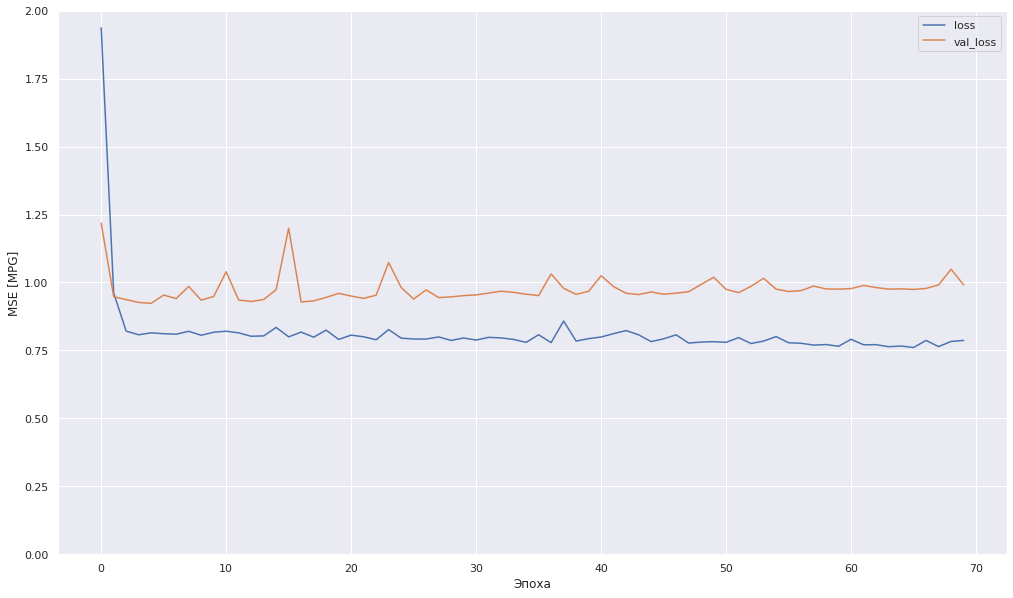

In [ ]:
plot_loss(history)

In [ ]:
X_test

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
507,2036.979393,653.611348,165.685912,23.170184,301.732089,127.348410,71.813188,2423.280274,210.332518,0.0,4.907887,48.035748
608,2192.738783,611.766338,108.265862,18.056093,339.313586,391.638637,69.687309,2832.268227,117.178874,90.0,7.955614,75.918566
452,1983.422534,714.079973,96.885762,20.490300,274.267099,769.383767,73.428673,2551.266585,190.042400,0.0,8.586122,79.737250
368,2008.300311,866.596263,82.558627,26.647004,274.563206,342.540268,78.202731,2407.873386,235.171423,0.0,8.465672,50.636439
242,1968.722168,137.285934,143.458271,23.029664,294.890570,564.054208,77.888476,3267.969502,227.387251,0.0,2.438243,53.971899
...,...,...,...,...,...,...,...,...,...,...,...,...
430,1980.823788,459.047070,81.162535,21.787358,322.371649,233.898871,73.789821,2219.142605,200.414215,0.0,3.717884,48.955385
587,1987.787140,569.930605,76.426670,23.348416,346.137893,641.922189,76.065686,3135.262653,234.932782,90.0,8.139645,56.326376
550,1959.650631,1133.894457,108.527433,21.169951,242.068879,594.850652,69.811373,2110.887258,278.622472,90.0,7.222974,74.685180
607,2072.959799,563.965041,86.803447,25.262955,285.407901,26.544979,71.337023,3041.020112,133.021557,90.0,7.318079,48.090478


In [ ]:
y_test.head(10)

507    3.508615
608    2.245217
452    2.086086
368    1.988732
242    4.543065
928    2.502333
262    2.192099
809    2.426130
318    3.358502
49     1.301025
Name: Соотношение матрица-наполнитель, dtype: float64

Визуализация результата работы модели на тестовых данных

In [ ]:
import plotly.express as px

result_data = pd.DataFrame()
result_data["Предсказанное значение"] = model.predict(np.array((X_test))).reshape(-1, )
result_data["Оригинальное значение"] = y_test.values

fig = px.scatter(result_data, x="Предсказанное значение", y="Оригинальное значение", trendline="ols")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
